In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

Part I : Data Cleaning and Visualizations:

In [22]:
img = cv2.imread("./test_images/steve jobs.jpg")
img.shape

(455, 728, 3)

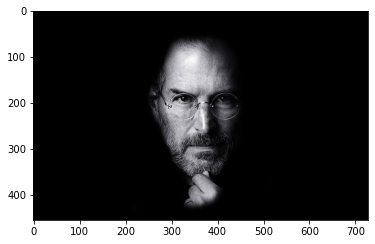

In [23]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [24]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eyes_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")


In [25]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 10) 
        
    return face_img
    

In [26]:
face_rects = face_cascade.detectMultiScale(img)
face_rects

array([[254, 106, 229, 229]], dtype=int32)

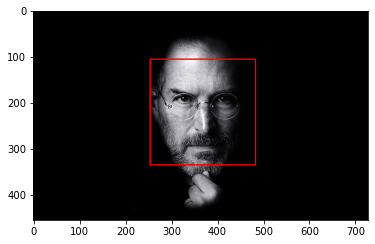

In [27]:
x,y,w,h = face_rects[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

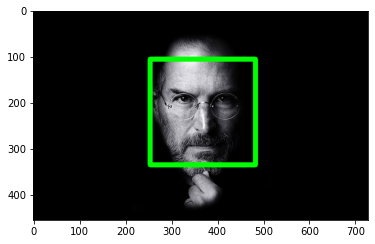

In [28]:
face_img = detect_face(img)
plt.imshow(face_img)

In [29]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eyes_cascade.detectMultiScale(face_img,scaleFactor=2, minNeighbors=0) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0), 2) 
        
    return face_img


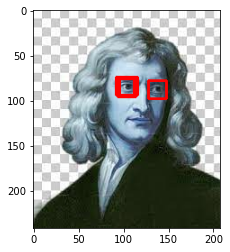

In [30]:
newton = cv2.imread(r"./test_images/newton.png")
result = detect_eyes(newton)
plt.imshow(result)

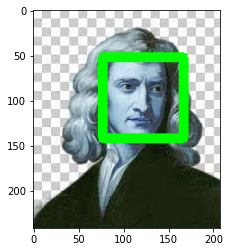

In [31]:
face_img = detect_face(newton)
plt.imshow(face_img)

In [32]:
# we need to find the face in the image, so this function will just return the face region of the image
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(img)
        if len(eyes) >= 2:
            return roi_color

In [33]:
#Next step is to create a new file for the cropped images
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [34]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path) # we create a list of all directories in pathway
    

In [35]:
img_dirs

['./dataset/Albert Einstein',
 './dataset/cropped',
 './dataset/Khabib Nurmuhammedov',
 './dataset/Michael Jordan',
 './dataset/Turgut Ozal']

In [36]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) # we recreate directory for the new cropped image

In [37]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Albert Einstein
Generating cropped images in folder:  ./dataset/cropped/Khabib Nurmuhammedov
Generating cropped images in folder:  ./dataset/cropped/Michael Jordan
Generating cropped images in folder:  ./dataset/cropped/Turgut Ozal


In [38]:
celebrity_file_names_dict

{'Albert Einstein': ['./dataset/cropped/Albert Einstein/Albert Einstein1.png',
  './dataset/cropped/Albert Einstein/Albert Einstein2.png',
  './dataset/cropped/Albert Einstein/Albert Einstein3.png',
  './dataset/cropped/Albert Einstein/Albert Einstein4.png',
  './dataset/cropped/Albert Einstein/Albert Einstein5.png',
  './dataset/cropped/Albert Einstein/Albert Einstein6.png',
  './dataset/cropped/Albert Einstein/Albert Einstein7.png',
  './dataset/cropped/Albert Einstein/Albert Einstein8.png',
  './dataset/cropped/Albert Einstein/Albert Einstein9.png',
  './dataset/cropped/Albert Einstein/Albert Einstein10.png',
  './dataset/cropped/Albert Einstein/Albert Einstein11.png',
  './dataset/cropped/Albert Einstein/Albert Einstein12.png',
  './dataset/cropped/Albert Einstein/Albert Einstein13.png',
  './dataset/cropped/Albert Einstein/Albert Einstein14.png',
  './dataset/cropped/Albert Einstein/Albert Einstein15.png',
  './dataset/cropped/Albert Einstein/Albert Einstein16.png',
  './dataset/c

In [39]:
#We need to delete empty cropped key from the dictioanry
del celebrity_file_names_dict["cropped"]
celebrity_file_names_dict

{'Albert Einstein': ['./dataset/cropped/Albert Einstein/Albert Einstein1.png',
  './dataset/cropped/Albert Einstein/Albert Einstein2.png',
  './dataset/cropped/Albert Einstein/Albert Einstein3.png',
  './dataset/cropped/Albert Einstein/Albert Einstein4.png',
  './dataset/cropped/Albert Einstein/Albert Einstein5.png',
  './dataset/cropped/Albert Einstein/Albert Einstein6.png',
  './dataset/cropped/Albert Einstein/Albert Einstein7.png',
  './dataset/cropped/Albert Einstein/Albert Einstein8.png',
  './dataset/cropped/Albert Einstein/Albert Einstein9.png',
  './dataset/cropped/Albert Einstein/Albert Einstein10.png',
  './dataset/cropped/Albert Einstein/Albert Einstein11.png',
  './dataset/cropped/Albert Einstein/Albert Einstein12.png',
  './dataset/cropped/Albert Einstein/Albert Einstein13.png',
  './dataset/cropped/Albert Einstein/Albert Einstein14.png',
  './dataset/cropped/Albert Einstein/Albert Einstein15.png',
  './dataset/cropped/Albert Einstein/Albert Einstein16.png',
  './dataset/c

In [41]:
# Assigning numbers for classes instead of celebrity names
class_names = dict()
count = 0 
for celebrity_name in celebrity_file_names_dict.keys():
    if not celebrity_name == 'cropped':
        class_names[celebrity_name] = count
        count += 1
class_names

{'Albert Einstein': 0,
 'Khabib Nurmuhammedov': 1,
 'Michael Jordan': 2,
 'Turgut Ozal': 3}

#Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier

In [42]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [43]:
#We will create X and Y's
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_names[celebrity_name])

In [44]:
X[0]

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [45]:
print(len(X))
print(len(y))

109
109


In [46]:
len(X[0]) #32*32*3 + 32*32

4096

In [47]:
#Transform X into a numpy array and change the data type from integers into afloat
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(109, 4096)

In [48]:
X[1]

array([ 61.,  61.,  61., ..., 183., 189.,  60.])

Part II: Training Model:

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

pipe = Pipeline([("scaler",StandardScaler()), ("svc", SVC(kernel="rbf",C=13,probability=True))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7857142857142857

In [51]:
print(classification_report(y_test, pipe.predict(X_test)))
print("**********************************************************")
print(confusion_matrix(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.83      0.71      0.77         7
           2       0.50      0.67      0.57         3
           3       0.67      0.50      0.57         4

    accuracy                           0.79        28
   macro avg       0.72      0.70      0.70        28
weighted avg       0.79      0.79      0.78        28

**********************************************************
[[13  1  0  0]
 [ 1  5  1  0]
 [ 0  0  2  1]
 [ 1  0  1  2]]


<AxesSubplot:>

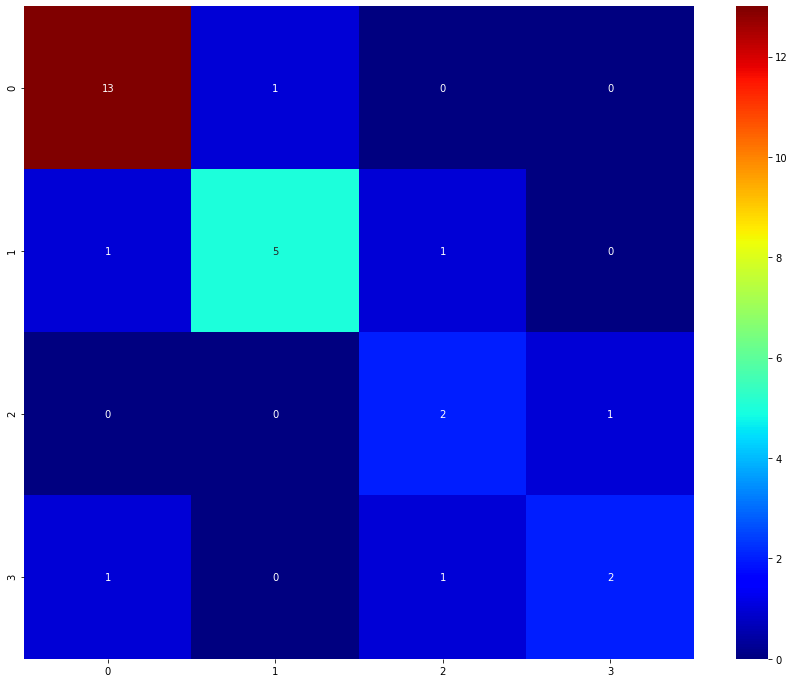

In [52]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(confusion_matrix(y_test, pipe.predict(X_test)),annot=True,cmap="jet")

In [53]:
#Save the Model:
import joblib
joblib.dump(pipe,"famous_person_classifier.pkl")

['famous_person_classifier.pkl']

In [54]:
#Save class dictionary:
import json
with open("class dictionary", "w") as file:
    file.write(json.dumps(class_names))